In [3]:
pip install numpy pandas mlxtend streamlit

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 28.1 MB/s eta 0:00:01
   - -------------------------------------- 0.5/12.8 MB 28.1 MB/s eta 0:00:01
   -- ------------------------------------- 0.8/12.8 MB 1.8 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/12.8 MB 1.4 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/12.8 MB 1.3 MB/s eta 0:00:09
   ---- ----------------------------------- 1.6/12.8 MB 1.1 MB/s eta 0:00:10
   ---- ----------------------------------- 1.6/12.8 MB 1.1 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/12.8 MB 1.0 MB/s eta 0:00:11
   ------ --------------------------------- 2.1/12.8 MB 1.0 MB/s eta 0:00:11
   ------- -------------------------------- 2.4/12.8 MB 1.1 MB/s eta 0:00:10
   -------- ------------------------------- 2.6/12.8 MB 1.1 MB/s eta 0:00:10
   --------


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd
data = pd.read_csv("bread_basket.csv")
print(data.shape)
data.head()

(20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [8]:
# format data waktu
data['date_time'] = pd.to_datetime(data['date_time'], format= "%d-%m-%Y %H:%M")

In [9]:
data["date_time"].dtype

dtype('<M8[ns]')

In [10]:
data["month"] = data['date_time'].dt.month
data["day"] = data['date_time'].dt.weekday
data["hour"] = data['date_time'].dt.hour
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


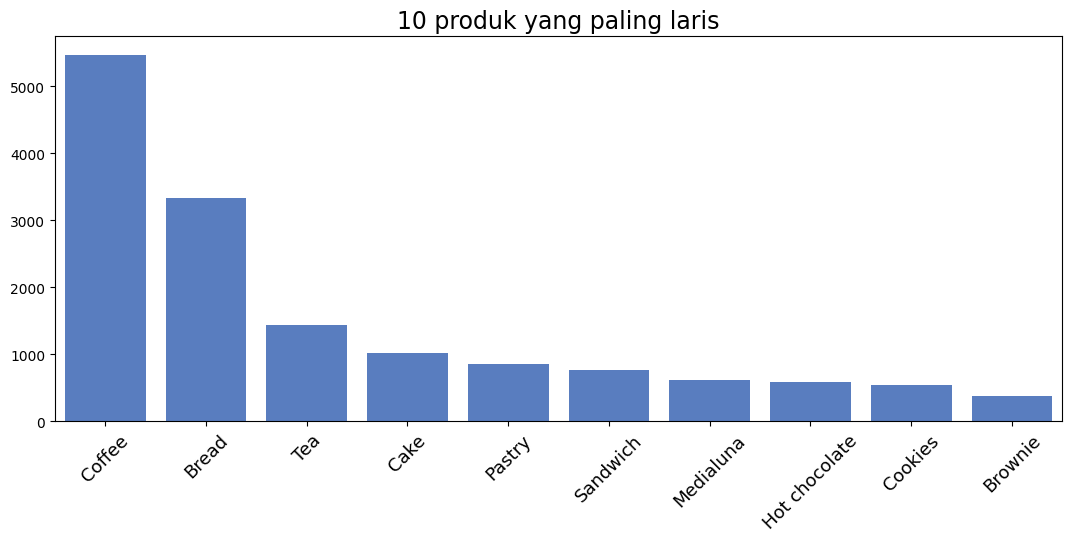

In [11]:
# menampilkan 10 item paling laris

plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data["Item"].value_counts()[:10].index, 
            y = data["Item"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 produk yang paling laris', size = 17)
plt.show()

Text(0.5, 1.0, 'jumlah transaksi tiap bulan dari oktober - april')

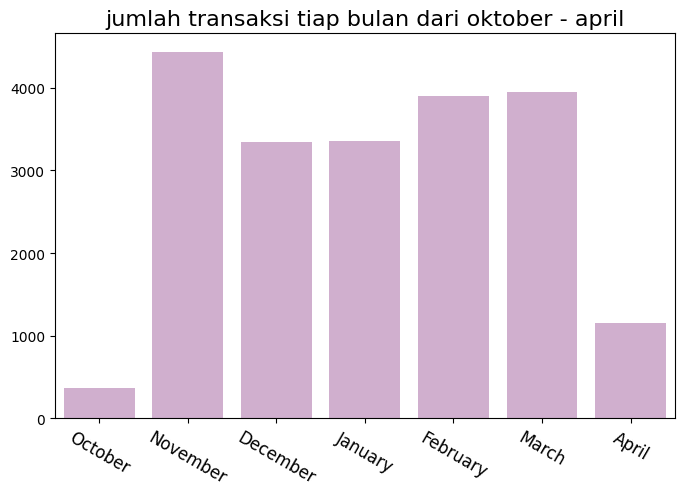

In [12]:
# transaksi tiap bulan

data_perbulan = data.groupby('month')['Transaction'].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

plt.figure(figsize= (8,5))
sns.barplot(
    x = ["October", "November", "December", "January", "February", "March", "April"],
    y = data_perbulan.values, color="#D5AAD3")
plt.xticks(size = 12, rotation = -30)
plt.title("jumlah transaksi tiap bulan dari oktober - april", size = 16)

Text(0.5, 1.0, 'Total Transaksi per hari')

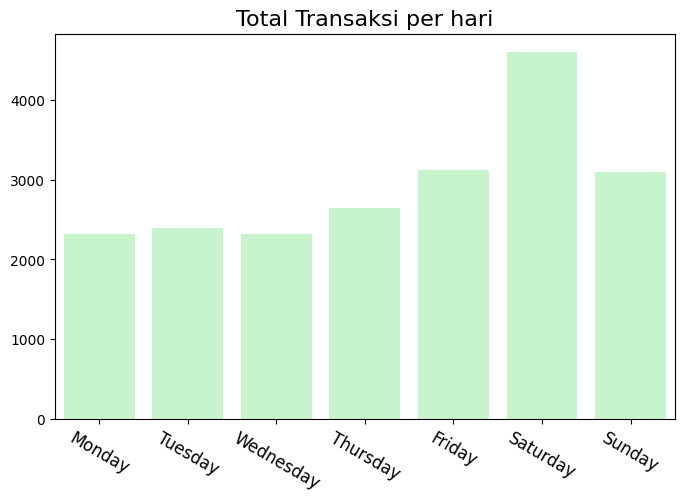

In [13]:
# transaksi per hari

data_perday = data.groupby('day')['Transaction'].count()

plt.figure(figsize= (8,5))
sns.barplot(
    x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    y = data_perday.values, color="#BFFCC6")
plt.xticks(size = 12, rotation = -30)
plt.title("Total Transaksi per hari", size = 16)

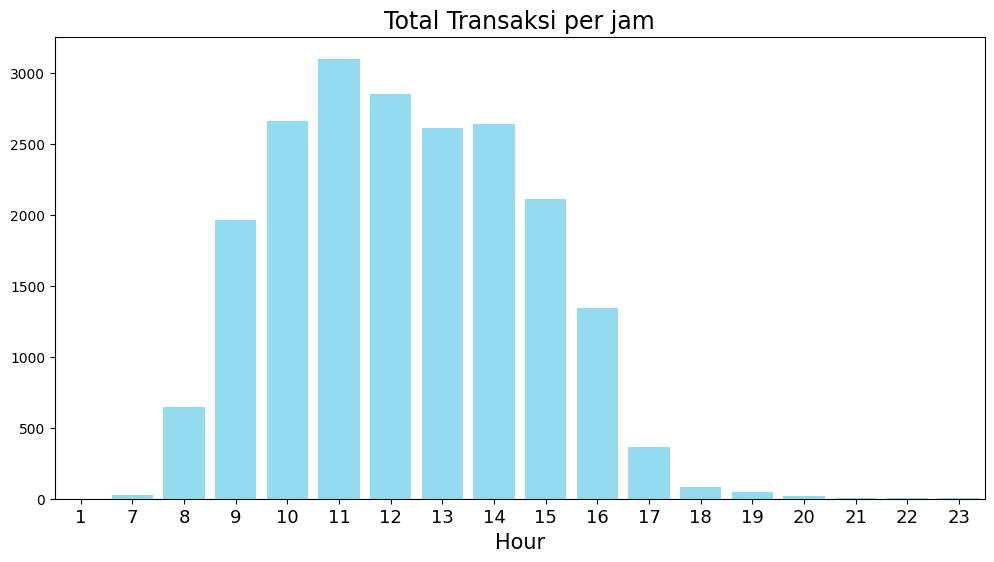

In [14]:
# pembelian tiap jam

data_perhour = data.groupby('hour')['Transaction'].count()

plt.figure(figsize= (12,6))
sns.barplot(
    x = data_perhour.index,
    y = data_perhour.values, color="#85E3FF")
plt.xlabel('Hour', size = 15)
plt.title("Total Transaksi per jam", size = 17)
plt.xticks(size = 13)
plt.show()

In [15]:
## data preparation

In [16]:
data["item"] = data["Item"].apply(lambda item: item.lower())

In [17]:
data["Item"] = data["Item"].apply(lambda item: item.strip())

In [18]:
data = data[["Transaction", "Item"]].copy()
data.head(10)

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
5,3,Cookies
6,4,Muffin
7,5,Coffee
8,5,Pastry
9,5,Bread


In [19]:
from mlxtend.frequent_patterns import association_rules, apriori

In [20]:
item_count = data.groupby(["Transaction", "Item"])["Item"].count().reset_index(name="Count")
item_count.head(10)

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
5,4,Muffin,1
6,5,Bread,1
7,5,Coffee,1
8,5,Pastry,1
9,6,Medialuna,1


In [21]:
item_count_pivot = item_count.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
print("Ukuran Dataset :",item_count_pivot.shape)
item_count_pivot.head()

Ukuran Dataset : (9465, 94)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
def encode(x):
  if x <=0:
      return 0
  elif x >= 1:
      return 1

item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

C:\Users\CARTEN\AppData\Local\Temp\ipykernel_23812\1990444313.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  item_count_pivot = item_count_pivot.applymap(encode)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
print("Ukuran dataset : ", item_count_pivot.shape)
print("Jumlah Transaksi : ", item_count_pivot.shape[0])
print("jumlah items : ", item_count_pivot.shape[1])

Ukuran dataset :  (9465, 94)
Jumlah Transaksi :  9465
jumlah items :  94


In [25]:
support = 0.01
frequent_items = apriori(item_count_pivot, min_support= support, use_colnames=True)
frequent_items.sort_values("support", ascending=False).head(10)

c:\Users\CARTEN\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.478394,(Coffee)
2,0.327205,(Bread)
26,0.142631,(Tea)
4,0.103856,(Cake)
34,0.090016,"(Coffee, Bread)"
19,0.086107,(Pastry)
21,0.071844,(Sandwich)
16,0.061807,(Medialuna)
12,0.058320,(Hot chocolate)
42,0.054728,"(Coffee, Cake)"


In [26]:
metric = "lift"
min_threshold = 1

rules = association_rules(frequent_items, metric=metric, min_threshold=min_threshold)[["antecedents","consequents","support","confidence","lift"]]
rules.sort_values('confidence', ascending=False,inplace=True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
30,(Toast),(Coffee),0.023666,0.704403,1.472431
28,(Spanish Brunch),(Coffee),0.010882,0.598837,1.251766
19,(Medialuna),(Coffee),0.035182,0.569231,1.189878
23,(Pastry),(Coffee),0.047544,0.552147,1.154168
1,(Alfajores),(Coffee),0.019651,0.540698,1.130235
16,(Juice),(Coffee),0.020602,0.534247,1.116750
24,(Sandwich),(Coffee),0.038246,0.532353,1.112792
7,(Cake),(Coffee),0.054728,0.526958,1.101515
26,(Scone),(Coffee),0.018067,0.522936,1.093107
12,(Cookies),(Coffee),0.028209,0.518447,1.083723
